# Data preprocessing and cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None
       fixed acidity  volatile acidity  citric acid  resid

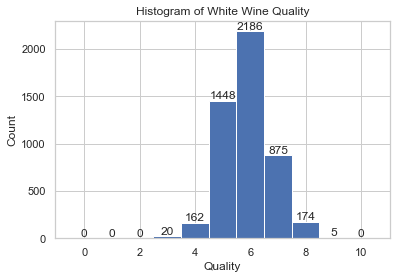

<Figure size 432x288 with 0 Axes>

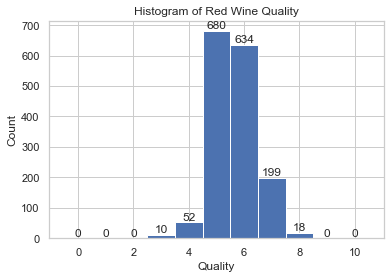

<Figure size 432x288 with 0 Axes>

In [2]:
# from IPython import get_ipython
# get_ipython().run_line_magic('matplotlib', 'inline')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_path = r'winequalityN.csv'
wine = pd.read_csv(data_path)

# explore whole data set
print(wine.info())
print(wine.describe())

# splitting  red/white datasets
white = wine[wine['type'] == 'white']
red = wine[wine['type'] == 'red']

# removing 'type' columns
white = white.drop(columns = ['type'])
red = red.drop(columns = ['type'])

# dropping records w/ missing values
white = white.dropna()
red = red.dropna()

bins = [0,1,2,3,4,5,6,7,8,9,10,11]

# white wine
fig, ax = plt.subplots(1,1)
ax.hist(white['quality'], bins=bins, align='left')
ax.set_title('Histogram of White Wine Quality')
ax.set_xlabel('Quality')
ax.set_ylabel('Count')
sns.set(style="whitegrid")
rects = ax.patches
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.5, '{:.0f}'.format(height), ha='center', va = 'bottom')
plt.show()
plt.clf()

# red wine
fig, ax = plt.subplots(1,1)
ax.hist(red['quality'], bins=bins, align='left')
ax.set_title('Histogram of Red Wine Quality')
ax.set_xlabel('Quality')
ax.set_ylabel('Count')
sns.set(style="whitegrid")
rects = ax.patches
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.5, '{:.0f}'.format(height), ha='center', va = 'bottom')
plt.show()
plt.clf()
              
# dropping 'outliers', i.e., records w/ 'quality' values of 3 or 9
white = white[(white.quality != 3) & (white.quality != 9)]
red = red[(red.quality != 3) & (red.quality != 9)]


# Exploratory Analysis of Each Wine


White Wine

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4845.000000       4845.000000  4845.000000     4845.000000   
mean        6.851465          0.277822     0.334138        6.396698   
std         0.836641          0.100322     0.121085        5.071325   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4845.000000          4845.000000           4845.000000  4845.000000   
mean      0.045755            35.244788            138.230031     0.994025   
std       0.021692            16.447952             42.000798     0.002993   
min       0.009000             2.00

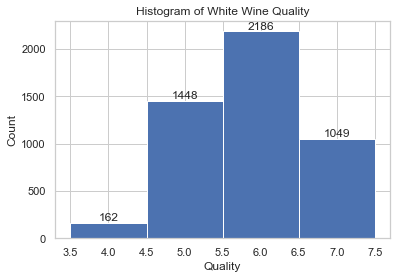

<Figure size 432x288 with 0 Axes>

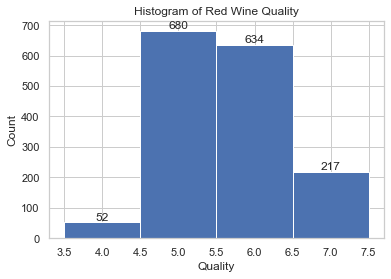

<Figure size 432x288 with 0 Axes>

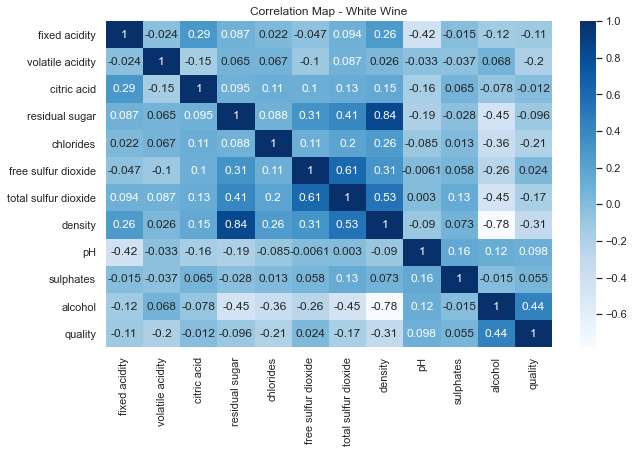

<Figure size 432x288 with 0 Axes>

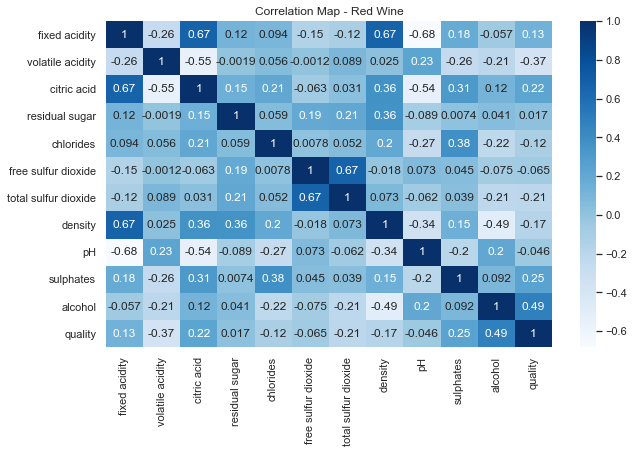

<Figure size 432x288 with 0 Axes>

In [3]:

## Data summary (mean, median, standard deviation, etc.)
# White wine
print("\nWhite Wine\n")
print(white.describe())
print(white.info())

# Red wine
print("\n\nRed Wine\n")
print(red.describe())
print(red.info())


## Data visualizations

labels = [4, 5, 6, 7, 8]
# Histograms
# white wine
fig, ax = plt.subplots(1,1)
ax.hist(white['quality'], bins=labels, align='left')
ax.set_title('Histogram of White Wine Quality')
ax.set_xlabel('Quality')
ax.set_ylabel('Count')
sns.set(style="whitegrid")
rects = ax.patches
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.5, '{:.0f}'.format(height), ha='center', va = 'bottom')
plt.show()
plt.clf()

# red wine
fig, ax = plt.subplots(1,1)
ax.hist(red['quality'], bins=labels, align='left')
ax.set_title('Histogram of Red Wine Quality')
ax.set_xlabel('Quality')
ax.set_ylabel('Count')
sns.set(style="whitegrid")
rects = ax.patches
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.5, '{:.0f}'.format(height), ha='center', va = 'bottom')
plt.show()
plt.clf()
# appears that quality of both red and white wine follows roughly a normal distribution

# Correlation maps
# white wine
plt.figure(figsize=(10,6))
corr_white = sns.heatmap(white.corr(), annot=True, cmap='Blues')
corr_white.set_title('Correlation Map - White Wine')
plt.show()
plt.clf()
# red wine
plt.figure(figsize=(10,6))
corr_red = sns.heatmap(red.corr(), annot=True, cmap='Blues')
corr_red.set_title('Correlation Map - Red Wine')
plt.show()
plt.clf()
# alcohol content has highest correlation with quality for both red and white wine

# Train/Test Split and Data Standardizations

In [4]:

from sklearn.feature_selection import SelectKBest
def FeatureSelection(k, df, x_train, y_train, x_test, y_test):
    s = SelectKBest(k=k).fit(x_train, y_train)
    mask = s.get_support(True)
    selected_features = df.columns[mask].tolist()
    train_selected = SelectKBest(k=k).fit_transform(x_train, y_train)
    test_selected = SelectKBest(k=k).fit_transform(x_test, y_test)
    return train_selected, test_selected, selected_features




# Paper did a 2/3 1/3 split
# It eventually won't matter when we do k-fold cross validation
# but it can easily be adjusted for preliminary models with test_size=0.33
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
test_size = 0.2

# Red wine
red_x = red.drop(['quality'], axis=1)
red_y = red['quality']
red_train_x, red_test_x, red_train_y, red_test_y = train_test_split(red_x, red_y, test_size=test_size, random_state=42, shuffle=True, stratify=red_y)
red_train_y = red_train_y.to_numpy()
red_test_y = red_test_y.to_numpy()

# White wine
white_x = white.drop(['quality'], axis=1)
white_y = white['quality']
white_train_x, white_test_x, white_train_y, white_test_y = train_test_split(white_x, white_y, test_size=test_size, random_state=42, shuffle=True, stratify=white_y)
white_train_y = white_train_y.to_numpy()
white_test_y = white_test_y.to_numpy()
              
# creating index of features
features = white_train_x.columns

# standardizing feature values
scaler = StandardScaler()
white_train_x = scaler.fit_transform(white_train_x)
white_test_x = scaler.fit_transform(white_test_x)
red_train_x = scaler.fit_transform(red_train_x)
red_test_x = scaler.fit_transform(red_test_x)


# Experimenting with feature selection

In [5]:

## Defining functions
def diff(l1, l2):
    return (list(list(set(l1)-set(l2))+ list(set(l2)-set(l1))))

l_red = []
l_white = []
sel_features_inorder_white = []
sel_features_inorder_red = []
for i in range(1, 12):
    white_train, white_test, white_selected_features = FeatureSelection(i, white_x, white_train_x, white_train_y, white_test_x, white_test_y)
    l_white.append(white_selected_features)
    red_train, red_test, red_selected_features = FeatureSelection(i, red_x, red_train_x, red_train_y, red_test_x, red_test_y)
    l_red.append(red_selected_features)
    if i == 1:
        sel_features_inorder_white.append(l_white[0])
        sel_features_inorder_red.append(l_red[0])
    else:
        sel_features_inorder_white.append(diff(l_white[i-1], l_white[i-2]))
        sel_features_inorder_red.append(diff(l_red[i-1], l_red[i-2]))
        
print(f'White selected features, in order: {sel_features_inorder_white}')
print(f'Red selected features, in order: {sel_features_inorder_red}')

White selected features, in order: [['alcohol'], ['density'], ['volatile acidity'], ['total sulfur dioxide'], ['chlorides'], ['residual sugar'], ['free sulfur dioxide'], ['fixed acidity'], ['pH'], ['sulphates'], ['citric acid']]
Red selected features, in order: [['alcohol'], ['volatile acidity'], ['total sulfur dioxide'], ['sulphates'], ['citric acid'], ['density'], ['fixed acidity'], ['chlorides'], ['free sulfur dioxide'], ['pH'], ['residual sugar']]


# Helper Functions/Variables and Imports

In [6]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV

def confusion(test, pred, labels, title):
    d = confusion_matrix(test, pred, labels = labels)
    df_cm = pd.DataFrame(d, columns = labels, index = labels)
    df_cm.columns.name = 'Predicted'
    df_cm.index.name = 'Actual'
    cm = sns.heatmap(df_cm, cmap = 'Blues', linewidths = 0.1, annot=True, fmt = 'd')
    cm.tick_params(left = False, bottom = False)
    cm.set_title(title)
    plt.show()
    plt.clf()

def plot_metrics(df, metric, color):
    sns.set(style="whitegrid")
    sns.despine(left=True)
    d = df[(df.Color==color)]
    print(d)
    plot = sns.barplot(x=d['Classifier'], y=d[metric])
    plt.title(f'Classification {metric} - {color} Wine dataset')
    if metric == 'SSE':
        fmt = '0.0f'
    else:
        fmt = '0.5f'
    for p in plot.patches:
        plot.annotate(format(p.get_height(), fmt),
                      (p.get_x() + p.get_width()/2, p.get_height()), 
                       ha = 'center', va = 'center',
                       xytext = (0,-20), 
                       textcoords = 'offset points', color = 'white')
    plt.show()
    plt.clf()
    
# defining SSE
def SSE(actual, pred):
    s = 0
    for i in range(len(actual)):
        s += abs(actual[i]-pred[i])**2
    return s

#Prints aout SSE and Accuracy Data and prints out graph
#Example
#svm_function(white_train_x, white_train_y, white_test_x, white_test_y)
#data_analyze("White", white_svm, "SVM")
score_df_col = ["Classifier", "Color", "Accuracy", "SSE"]
score_df = pd.DataFrame(columns=score_df_col)

def data_analyze(test_y, y_pred, wine_color, classifier_name):
    wine_color = wine_color.title()
    labels = [4,5,6,7,8]

    acc = accuracy_score(test_y, y_pred)
    SSE_data = SSE(test_y, y_pred)
    score_df.loc[len(score_df.index)] = [classifier_name, wine_color, acc, SSE_data]
    
    print (f"Accuracy for {classifier_name} on {wine_color} dataset is {acc}")
    print (f"SSE for {classifier_name} on {wine_color} dataset is {SSE_data}")
    title = f"{classifier_name} - {wine_color} Wine"
    confusion(test_y, y_pred, labels, title)


def ROC_AUC(y_pred, y_true, pos_group=None):
    fpr, tpr, thresholds = metrics.roc_curve(y_true=y_true, y_score=y_pred, pos_label=pos_group)
    auc_result = metrics.auc(fpr, tpr)
    return fpr, tpr, auc_result

def plotROCAUC(df, df2, classes, micro_fpr, micro_tpr, micro_roc_auc):
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate( [df2['fpr'][i] for i in classes] ))
    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in classes:
        mean_tpr += np.interp(all_fpr, df2['fpr'][i], df2['tpr'][i])
    # Finally average it and compute AUC
    mean_tpr /= len(classes)
    macro_fpr = all_fpr
    macro_tpr = mean_tpr
    macro_roc_auc = metrics.auc(macro_fpr, macro_tpr)
    # Plot ROC AUC curves
    lw = 2
    plt.figure(figsize=(10,6))
    plt.plot(micro_fpr, micro_tpr, label='micro-average ROC curve (area = {0:0.2f})'.format(micro_roc_auc),
         color='deeppink', linestyle=':', linewidth=4)
    plt.plot(macro_fpr, macro_tpr, label='macro-average ROC curve (area = {0:0.2f})'.format(macro_roc_auc),
         color='crimson', linestyle=':', linewidth=4)
    colors = ['aqua', 'darkorange', 'cyan', 'lightcoral', 'olive', 'fuchsia', 'indigo']
    for i, color in zip(classes, colors[:len(classes)]):
        plt.plot(df2['fpr'][i], df2['tpr'][i], color=color, lw=lw,
                label='ROC curve of class {0} (area = {1:0.2f})'.format(i, df['roc auc'][i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

def PR_AUC(y_pred, y_true, pos_group=None):
    avg_precision = metrics.average_precision_score(y_true=y_true, y_score=y_pred, pos_label=pos_group)
    precision, recall, thresholds = metrics.precision_recall_curve(y_true=y_true, probas_pred=y_pred, pos_label=pos_group)
    return precision, recall, avg_precision

def plotPRAUC(df, df2, classes, y_test, y_score, micro_precision, micro_recall, micro_avg_precision):
    # honeslty I don't know if this is portable or correct...meh
    # First aggregate all precision
    all_precision = np.unique(np.concatenate( [df2['precision'][i] for i in classes] ))
    # Then interpolate all pr curves at this points
    mean_recall = np.zeros_like(all_precision)
    for i in classes:
        mean_recall += np.interp(all_precision, df2['precision'][i], df2['recall'][i])
    # Finally average it and compute AUC
    mean_recall /= len(classes)
    macro_precision = all_precision
    macro_recall = mean_recall    
    macro_avg_precision = metrics.average_precision_score(y_true=y_test, y_score=y_score, pos_label=1)
    # macro_avg_precision_auc = metrics.auc(macro_precision, macro_recall)
    # print(macro_avg_precision_auc, macro_avg_precision)
    # average precision, also know as precision-recall area under the curve
    # Plot PR AUC curves
    lw = 2
    plt.figure(figsize=(10,6))
    plt.plot(micro_precision, micro_recall, label='micro-average PR curve (area = {0:0.2f})'.format(micro_avg_precision),
         color='deeppink', linestyle=':', linewidth=4)
    plt.plot(macro_precision, macro_recall, label='macro-average PR curve (area = {0:0.2f})'.format(macro_avg_precision),
         color='crimson', linestyle=':', linewidth=4)
    colors = ['aqua', 'darkorange', 'cyan', 'lightcoral', 'olive', 'fuchsia', 'indigo']
    for i, color in zip(classes, colors[:len(classes)]):
        plt.plot(df2['precision'][i], df2['recall'][i], color=color, lw=lw,
                label='PR curve of class {0} (area = {1:0.2f})'.format(i, df['pr avg prec'][i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title('Precision-Recall to multi-class')
    plt.legend(loc="lower right")
    plt.show()

# Learn to predict each class against the other
def oneVsRestAnalysis(model, X_train, y_train, X_test, y_test, classes):
    # https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn.preprocessing import label_binarize

    # Binarize the output
    y_train = label_binarize(y_train, classes=classes)
    y_test = label_binarize(y_test, classes=classes)
    # create classifier for multi-label classification
    clf = OneVsRestClassifier(model)
    y_score = clf.fit(X_train, y_train).decision_function(X_test)

    # Compute performance metrics
    curve_dict = { 'quality': [], 'fpr': [], 'tpr': [], 'precision': [], 'recall': [] }
    df_dict = { 'quality': [], 'roc auc': [], 'pr avg prec': [] } 
    for i,x in enumerate(classes):
        df_dict['quality'].append(x)
        curve_dict['quality'].append(x)
        # curves can't handle mutli-label, so only give column that correpsonds to binarized label with [:, i]
        fpr, tpr, roc_auc = ROC_AUC(y_true=y_test[:, i], y_pred=y_score[:, i], pos_group=1)
        curve_dict['fpr'].append(fpr)
        curve_dict['tpr'].append(tpr)
        df_dict['roc auc'].append(roc_auc)

        prec, recall, pr_avg_prec = PR_AUC(y_true=y_test[:, i], y_pred=y_score[:, i], pos_group=1)
        curve_dict['precision'].append(prec)
        curve_dict['recall'].append(recall)
        df_dict['pr avg prec'].append(pr_avg_prec)

    # Compute micro-averages 
    micro_fpr, micro_tpr, micro_roc_auc = ROC_AUC(y_true=y_test.ravel(), y_pred=y_score.ravel(), pos_group=1)
    micro_precision, micro_recall, micro_avg_precision = PR_AUC(y_true=y_test.ravel(), y_pred=y_score.ravel(), pos_group=1)

    # Analyze roc_auc and pr_auc for the classes
    df = pd.DataFrame.from_dict(df_dict)
    df.set_index('quality', inplace=True)

    df2 = pd.DataFrame.from_dict(curve_dict)
    df2.set_index('quality', inplace=True)

    plotROCAUC(df, df2, classes, micro_fpr, micro_tpr, micro_roc_auc)

    plotPRAUC(df, df2, classes, y_test, y_score, micro_precision, micro_recall, micro_avg_precision)

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 317 samples in 0.001s...
[t-SNE] Computed neighbors for 317 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 317 / 317
[t-SNE] Mean sigma: 1.010964
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.465164
[t-SNE] KL divergence after 1000 iterations: 0.787422


C:\Users\Mathew\.conda\envs\bicb\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


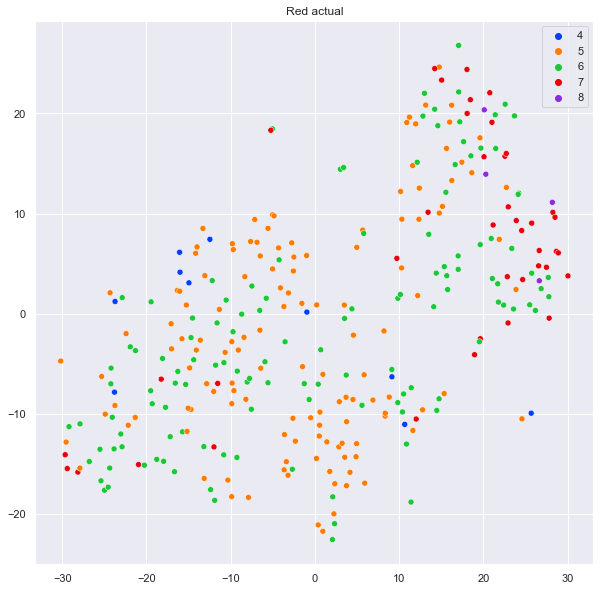

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 969 samples in 0.001s...
[t-SNE] Computed neighbors for 969 samples in 0.047s...
[t-SNE] Computed conditional probabilities for sample 969 / 969
[t-SNE] Mean sigma: 1.147453
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.411972
[t-SNE] KL divergence after 1000 iterations: 1.129969


C:\Users\Mathew\.conda\envs\bicb\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


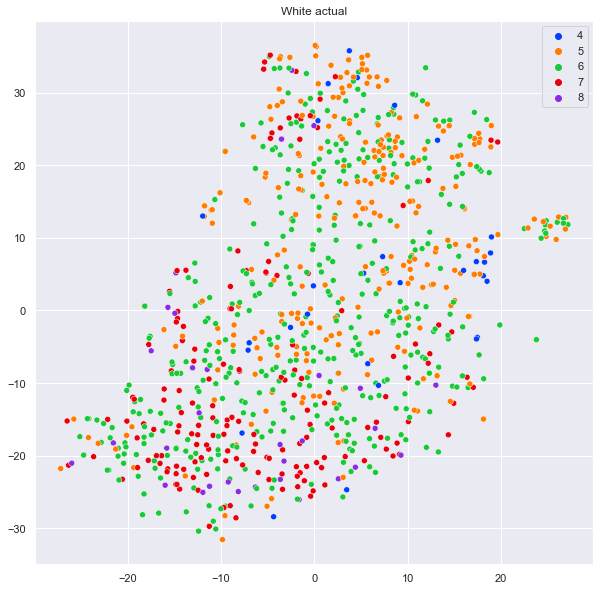

In [7]:
#perplexity = 50 for white test data perplexity = 20 for red test data
#I might have to play around a little bit more
from sklearn.manifold import TSNE

def two_dimensional_representation(x_data,y_data,title="t-SNE wine",perplexity = 50):
    tsne = TSNE(verbose=1, perplexity=perplexity, random_state = 42)
    X_embedded_data = tsne.fit_transform(x_data)

    # sns settings
    sns.set(rc={'figure.figsize':(10,10)})

    # colors
    palette = sns.color_palette("bright", len(set(y_data)))

    # plot
    sns.scatterplot(X_embedded_data[:,0], X_embedded_data[:,1], hue = y_data, palette=palette)

    plt.title(title)
    # plt.savefig("plots/t-sne_wine.png")
    plt.show()

two_dimensional_representation(red_test_x,red_test_y,"Red actual",20)
two_dimensional_representation(white_test_x,white_test_y,"White actual",50)

# Classifiers

## Trivial

In [ ]:
# predicts the mode (6 for white records, 5 for red) for all records
# this will serve as baseline for performance
from scipy import stats

# TODO: X data sets for trian and test are unused
def do_trivial(train_x, train_y, test_x, test_y, color):
    pred = np.full(test_y.shape, stats.mode(train_y)[0])
    data_analyze(test_y, pred, color, 'Trivial')
    return pred

do_trivial(white_train_x, white_train_y, white_test_x, white_test_y, 'White')
do_trivial(red_train_x, red_train_y, red_test_x, red_test_y, 'Red')

## Author's SVM

In [9]:
# Replicate 
from sklearn.svm import SVR
def Authors_SVM(x_train, y_train, x_test, y_test, color=None):
    # using gamma values that the authors found were the best
    white_gamma = 2**1.55  # 2.928
    red_gamma = 2**0.19  # 1.14
    gamma = np.logspace(-3, 6, 20, 2)
    grid_search = {'C':range(1,20), 'gamma':gamma}
    best_w = {'C': [2], 'gamma': [0.6951927961775606]}
    best_r = {'C': [1], 'gamma': [0.07847599703514611]}
    author_params = {'C':[3], 'gamma':[white_gamma, red_gamma]}
    svm_clf = SVR(kernel='rbf')
    param=None
    if color == 'white':
        param = best_w
    elif color == 'red':
        param = best_r
    elif color == 'authors-red' or color == 'authors-white':
        param = author_params
    else:  # no color given then seraches for best scores
        param = grid_search

    clf = GridSearchCV(svm_clf, param, n_jobs=1, verbose=True, cv=5)

    #new_x_train, new_x_test = FeatureSelection(11, x_train, y_train, x_test, y_test)
    new_x_train = x_train
    new_x_test = x_test
    clf.fit(new_x_train, y_train)
    y_pred = clf.predict(new_x_test)
    y_pred = np.rint(y_pred)  # round predictions to nearest integer for classification

    if color == 'white' or color == 'red' or color == 'authors-red' or color == 'authors-white':
        data_analyze(y_test, y_pred, color, "Auth-SVM")

    if color==None:
        print('best parameters: {}', clf.best_params_)
        print('best score: {}', clf.best_score_)
        print("MAE: {}", mean_absolute_error(y_test, y_pred)) 
        print(confusion_matrix(y_test, y_pred))
        print(precision_score(y_test, y_pred, average=None, zero_division=0))
        

### Best Parameters

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Accuracy for Auth-SVM on White dataset is 0.6945304437564499
SSE for Auth-SVM on White dataset is 398.0


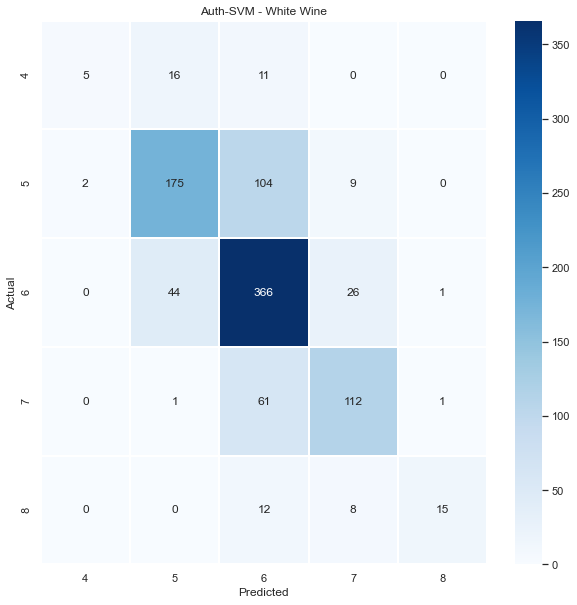

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Accuracy for Auth-SVM on Red dataset is 0.6088328075709779
SSE for Auth-SVM on Red dataset is 151.0


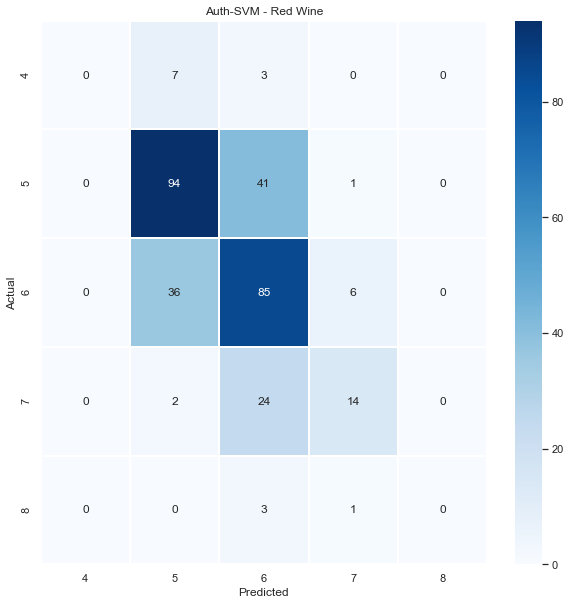

<Figure size 720x720 with 0 Axes>

In [10]:
Authors_SVM(white_train_x, white_train_y, white_test_x, white_test_y, 'white')
Authors_SVM(red_train_x, red_train_y, red_test_x, red_test_y, 'red')

### Author's Parameters

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuracy for Auth-SVM on Authors-White dataset is 0.6666666666666666
SSE for Auth-SVM on Authors-White dataset is 451.0


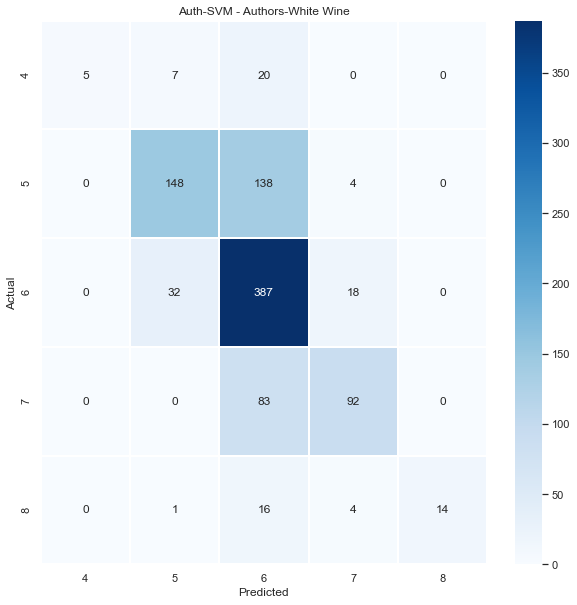

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuracy for Auth-SVM on Authors-Red dataset is 0.6214511041009464
SSE for Auth-SVM on Authors-Red dataset is 141.0


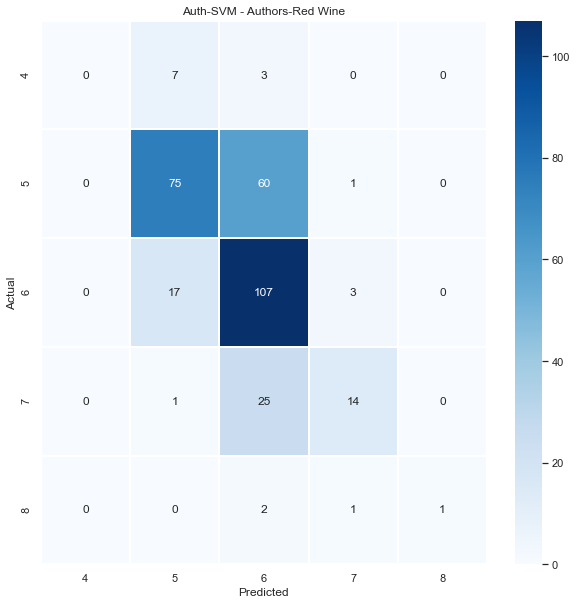

<Figure size 720x720 with 0 Axes>

In [11]:
Authors_SVM(white_train_x, white_train_y, white_test_x, white_test_y, 'authors-white')
Authors_SVM(red_train_x, red_train_y, red_test_x, red_test_y, 'authors-red')

### Search For Best Parameters

In [14]:
#Authors_SVM(white_train_x, white_train_y, white_test_x, white_test_y)
Authors_SVM(red_train_x, red_train_y, red_test_x, red_test_y)  # {'C': 1, 'gamma': 0.07847599703514611}

Fitting 5 folds for each of 380 candidates, totalling 1900 fits
best parameters: {} {'C': 1, 'gamma': 0.07847599703514611}
best score: {} 0.4119557669401422
MAE: {} 0.4195583596214511
[[ 0  7  3  0  0]
 [ 0 94 41  1  0]
 [ 0 36 85  6  0]
 [ 0  2 24 14  0]
 [ 0  0  3  1  0]]
[0.         0.67625899 0.54487179 0.63636364 0.        ]


## Kmeans clustering

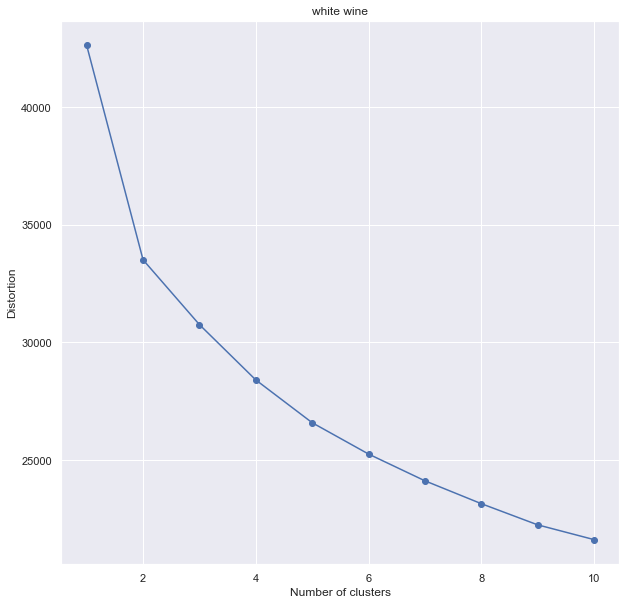

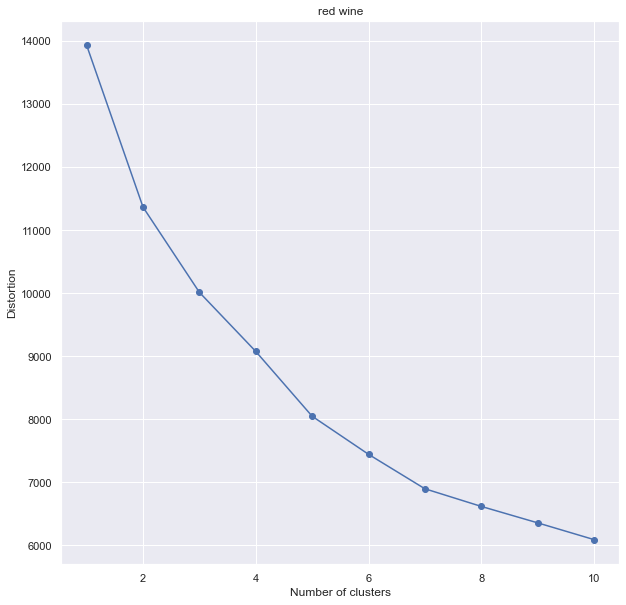

In [12]:
from sklearn.cluster import KMeans
def K_means(x_train, y_train, x_test, y_test, title = "Wine"):
    distortions = []
    for k in range(1,11):
        kmeans = KMeans(n_clusters=k, verbose=False, random_state=42)
        kmeans.fit(x_train, y_train)
        distortions.append(kmeans.inertia_)
    plt.plot(range(1, 11), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title(title)
    plt.show()

    # print confusion matrix
    #conf = confusion_matrix(y_test, y_pred)
    #print(conf)
    
    # get precision scores
    #prec_w = precision_score(y_test, y_pred, average=None, zero_division=0)
    #print(prec_w)

K_means(white_train_x, white_train_y, white_test_x, white_test_y,"white wine")
K_means(red_train_x, red_train_y, red_test_x, red_test_y,"red wine")

## Radius Nearest Neighbors

In [ ]:
# the unsupervised version doesn't allow for classification
from sklearn.neighbors import RadiusNeighborsClassifier
def RNC(x_train, y_train, x_test, y_test, color=None):
    grid_search = {
        'weights': ['uniform', 'distance'],
        'radius': np.arange(1.0, 11.0, 0.5),
        'n_jobs': [1],
        'outlier_label':['most_frequent'],
        'algorithm': ['ball_tree', 'kd_tree', 'brute']
        }
    best_w = {'algorithm': ['ball_tree'], 'n_jobs': [1], 'outlier_label': ['most_frequent'], 'radius': [2.5], 'weights': ['distance']}
    best_r = {'algorithm': ['ball_tree'], 'n_jobs': [1], 'outlier_label': ['most_frequent'], 'radius': [2.5], 'weights': ['distance']}
    param=None
    if color == 'white':
        param = best_w
    elif color == 'red':
        param = best_r
    else:
        param = grid_search
    model = RadiusNeighborsClassifier()
    clf = GridSearchCV(model, param, n_jobs=1, verbose=True, cv=3)  # cv=3 so that we have enough classes in each k-fold

    new_x_train, new_x_test, selected_features = FeatureSelection(11, red_x, x_train, y_train, x_test, y_test)
    # new_x_train = x_train
    # new_x_test = x_test
    clf.fit(new_x_train, y_train)
    y_pred = clf.predict(new_x_test)


    y_pred = np.rint(y_pred)  # round predictions to nearest integer for classification

    if color == 'white' or color == 'red':
        data_analyze(y_test, y_pred, color, "RNC")

    if color==None:
        print('best parameters: {}', clf.best_params_)
        print('best score: {}', clf.best_score_)
        print("MAE: {}", mean_absolute_error(y_test, y_pred)) 
        print(confusion_matrix(y_test, y_pred))
        print(precision_score(y_test, y_pred, average=None, zero_division=0))
    
RNC(white_train_x, white_train_y, white_test_x, white_test_y, 'white')
RNC(red_train_x, red_train_y, red_test_x, red_test_y, 'red')

## Decision Tree

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
def do_tree(train_x, train_y, test_x, test_y, params, color):
    dt = tree.DecisionTreeClassifier(max_depth = params['max_depth'],
                                      max_leaf_nodes = params['max_leaf_nodes'],
                                      criterion = params['criterion'],
                                      random_state = 42)
    d = dt.fit(train_x, train_y)
    pred = d.predict(test_x)
    data_analyze(test_y, pred, color, 'DT')
    return pred

def optimize_tree(df, x_train, y_train, x_test, y_test, params):
    n = []
    parameters = []
    accuracy = []
    sse = []
    for i in range(1,12):
        n.append(i)
        train, test, x = FeatureSelection(i, df, x_train, y_train, x_test, y_test)
        dt = tree.DecisionTreeClassifier(random_state = 42)
        clf = RandomizedSearchCV(dt, params, n_jobs=1, n_iter=10, verbose=True, random_state=42, cv=3)
        clf.fit(train, y_train)
        p = clf.best_params_
        parameters.append(p)
        d = tree.DecisionTreeClassifier(max_depth = p['max_depth'],
                                      max_leaf_nodes = p['max_leaf_nodes'],
                                      criterion = p['criterion'],
                                      random_state = 42)
        d2 = d.fit(train, y_train)
        pred = d2.predict(test)
        acc = accuracy_score(y_test, pred)
        s = SSE(y_test, pred)
        accuracy.append(acc)
        sse.append(s)
    data = {'Number of Features': n, 'Parameters': parameters, 'Accuracy': accuracy, 'SSE': sse}
    dataframe = pd.DataFrame(data = data)
    best = dataframe.loc[dataframe['Accuracy'].idxmax()]
    best_k = best[0]
    best_params = best[1]
    return dataframe, best_k, best_params
    
parameters = {'max_depth':range(1,1000), 'criterion' :['gini', 'entropy'],
              'max_leaf_nodes':range(1,1000)}

white_tree_df, white_tree_best_k, white_tree_best_params = optimize_tree(white_x, white_train_x, white_train_y, white_test_x, white_test_y, parameters)   
red_tree_df, red_tree_best_k, red_tree_best_params = optimize_tree(red_x, red_train_x, red_train_y, red_test_x, red_test_y, parameters)   

white_tree_train_selected, white_tree_test_selected, white_tree_selected_features = FeatureSelection(white_tree_best_k, white_x, white_train_x, white_train_y, white_test_x, white_test_y)
red_tree_train_selected, red_tree_test_selected, red_tree_selected_features = FeatureSelection(red_tree_best_k, red_x, red_train_x, red_train_y, red_test_x, red_test_y)

white_tree_pred = do_tree(white_tree_train_selected, white_train_y, white_tree_test_selected, white_test_y, white_tree_best_params, 'White')
red_tree_pred = do_tree(red_tree_train_selected, red_train_y, red_tree_test_selected, red_test_y, red_tree_best_params, 'Red')

# best for white is 9 features, 827 leaf nodes, 672 max depth, and gini criterion
# best for red is 2 features, 65 leaf nodes, 144 max depth, and gini criterion

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
def gaussian_nb(x_train, y_train, x_test, y_test, color):
    gnb = GaussianNB()
    gnb.fit(x_train, y_train)
    y_pred = gnb.predict(x_test)
    data_analyze(y_test, y_pred, color, "GNB")

gaussian_nb(white_train_x, white_train_y, white_test_x, white_test_y,"White")
gaussian_nb(red_train_x, red_train_y, red_test_x, red_test_y,"Red")



## K-nearest neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# feature selection
# testing feature selection produced best results for using all features for both datasets   
def do_knn(train_x, train_y, test_x, test_y, params, color):
    k = KNeighborsClassifier(n_neighbors = params['n_neighbors'],
                           weights = params['weights'])
    k.fit(train_x, train_y)
    pred = k.predict(test_x)
    data_analyze(test_y, pred, color, 'KNN')
    return pred

def optimize_knn(df, x_train, y_train, x_test, y_test, params):
    n = []
    parameters = []
    accuracy = []
    sse = []
    for i in range(1,12):
        n.append(i)
        train, test, x = FeatureSelection(i, df, x_train, y_train, x_test, y_test)
        knn = KNeighborsClassifier()
        clf = GridSearchCV(knn, params, scoring='accuracy', n_jobs=1, verbose=True, cv=3)
        clf.fit(train, y_train)
        p = clf.best_params_
        parameters.append(p)
        k = KNeighborsClassifier(n_neighbors = p['n_neighbors'],
                           weights = p['weights'])
        k.fit(train, y_train)
        pred = k.predict(test)
        acc = accuracy_score(y_test, pred)
        s = SSE(y_test, pred)
        accuracy.append(acc)
        sse.append(s)
    data = {'Number of Features': n, 'Parameters': parameters, 'Accuracy': accuracy, 'SSE': sse}
    dataframe = pd.DataFrame(data = data)
    best = dataframe.loc[dataframe['Accuracy'].idxmax()]
    best_k = best[0]
    best_params = best[1]
    return dataframe, best_k, best_params

parameters = {'n_neighbors':range(1,20), 'weights':['uniform', 'distance']}

red_knn_df, red_knn_best_k, red_knn_best_params = optimize_knn(red_x, red_train_x, red_train_y, red_test_x, red_test_y, parameters)   
white_knn_df, white_knn_best_k, white_knn_best_params = optimize_knn(white_x, white_train_x, white_train_y, white_test_x, white_test_y, parameters)  

white_knn_train_selected, white_knn_test_selected, white_knn_selected_features = FeatureSelection(white_knn_best_k, white_x, white_train_x, white_train_y, white_test_x, white_test_y)
red_knn_train_selected, red_knn_test_selected, red_knn_selected_features = FeatureSelection(red_knn_best_k, red_x, red_train_x, red_train_y, red_test_x, red_test_y)

white_knn_pred = do_knn(white_knn_train_selected, white_train_y, white_knn_test_selected, white_test_y, white_knn_best_params, 'White')
red_knn_pred = do_knn(red_knn_train_selected, red_train_y, red_knn_test_selected, red_test_y, red_knn_best_params,  'Red')

# best for white is 11 features, 17 NN, weights = distance
# best for red is 5 features, 13 NN, weights = distance

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import kneighbors_graph
def KNR(x_train, y_train, x_test, y_test, color=None):
    grid_search = {
        'weights': ['distance'],
        'n_neighbors': range(1, 50),
        'n_jobs': [1],
        'algorithm': ['ball_tree']
        }
    best_w = {'algorithm': ['ball_tree'], 'n_jobs': [1], 'n_neighbors': [26], 'weights': ['distance']}
    best_r = {'algorithm': ['ball_tree'], 'n_jobs': [1], 'n_neighbors': [2.5], 'weights': ['distance']}
    param=None
    if color == 'white':
        param = best_w
    elif color == 'red':
        param = best_r
    else:
        param = grid_search
    model = KNeighborsRegressor()
    clf = GridSearchCV(model, grid_search, n_jobs=2, verbose=True, cv=5)  # cv=3 so that we have enough classes in each k-fold

    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    y_pred = np.rint(y_pred)  # round predictions to nearest integer for classification

    if color == 'white' or color == 'red':
        print('best parameters: {}', clf.best_params_)
        data_analyze(y_test, y_pred, color, "RNC")
        # A = kneighbors_graph(x_test, 2, mode='connectivity', include_self=True)
        # print(A)

    if color==None:
        print('best parameters: {}', clf.best_params_)
        print('best score: {}', clf.best_score_)
        print("MAE: {}", mean_absolute_error(y_test, y_pred)) 
        print(confusion_matrix(y_test, y_pred))
        print(precision_score(y_test, y_pred, average=None, zero_division=0))
    
KNR(white_train_x, white_train_y, white_test_x, white_test_y, 'white')
KNR(red_train_x, red_train_y, red_test_x, red_test_y, 'red')

## Support Vector Machines

In [ ]:
from sklearn import svm
def svm_function(x_train, y_train, x_test, y_test, color):
    rbf = svm.SVC(kernel = 'rbf', random_state = 42)
    rbf.fit(x_train,y_train)
    y_pred = rbf.predict(x_test)
    data_analyze(y_test, y_pred, color, "SVM")

svm_function(white_train_x, white_train_y, white_test_x, white_test_y,"White")
svm_function(red_train_x, red_train_y, red_test_x, red_test_y,"Red")


## Neural network

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Accuracy for MLP on White dataset is 0.5490196078431373
SSE for MLP on White dataset is 509.0


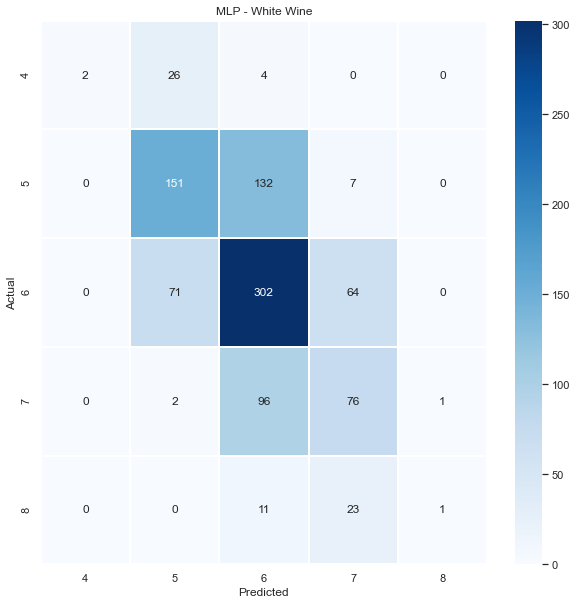

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Accuracy for MLP on Red dataset is 0.583596214511041
SSE for MLP on Red dataset is 156.0


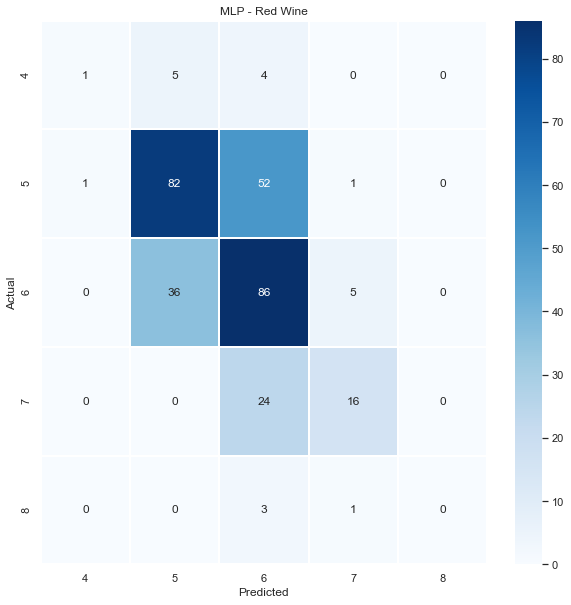

<Figure size 720x720 with 0 Axes>

In [13]:
# might not have great performance
from sklearn.neural_network import MLPRegressor

def MLP_Regressor(x_train, y_train, x_test, y_test, color=None):
    grid_search = {
        'activation': ['logistic', 'identity', 'tanh', 'relu'],
        'alpha': [0.01, 0.001, 0.0001, 0.00001],
        'learning_rate': ['constant', 'invscaling', 'adaptive'],
        'solver': ['lbfgs', 'sgd', 'adam'], 
        'random_state':[42],
        'max_iter': [500],
        }
    best_w = {'activation': ['relu'], 'alpha': [0.01], 'learning_rate': ['constant'], 'random_state': [42], 'solver': ['sgd'], 'max_iter': [100000]}
    best_r = {'activation': ['tanh'], 'alpha': [0.01], 'learning_rate': ['constant'], 'random_state': [42], 'solver': ['adam'], 'max_iter': [100000]}
    model = MLPRegressor()
    param = None
    if color == 'white': 
        param = best_w
    elif color == 'red':
        param = best_r
    else:
        param = grid_search
    clf = GridSearchCV(model, param, n_jobs=1, verbose=True, cv=5)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    y_pred = np.rint(y_pred)  # round predictions to nearest integer for classification

    if color == 'white' or color == 'red':
        data_analyze(y_test, y_pred, color, "MLP")

    if color==None:
        print('best parameters: {}', clf.best_params_)
        print('best score: {}', clf.best_score_)
        print("MAE: {}", mean_absolute_error(y_test, y_pred)) 
        print(confusion_matrix(y_test, y_pred))
        print(precision_score(y_test, y_pred, average=None, zero_division=0))

MLP_Regressor(white_train_x, white_train_y, white_test_x, white_test_y, 'white')
MLP_Regressor(red_train_x, red_train_y, red_test_x, red_test_y, 'red')

## Plotting Performance

In [ ]:
# bar graphs to compare performance of classifiers

plot_metrics(score_df, 'Accuracy', 'White')
plot_metrics(score_df, 'Accuracy', 'Red')